In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [187]:
df = pd.read_csv('df_final.csv')
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,ChargesTotal_Faixa,Churn_num
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,501-1000,0
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,501-1000,0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,0-500,1
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1001-1500,1
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,0-500,1


#### Remoção de Colunas Irrelevantes

In [188]:
df = df.drop(columns=['customerID'])

#### Encoding

In [189]:
df = pd.get_dummies(df, drop_first=True)

#### Verificação da Proporção de Evasão

In [190]:
df['Churn_num'].value_counts(normalize=True)

Churn_num
0    0.734215
1    0.265785
Name: proportion, dtype: float64

In [191]:
X = df.drop(columns=['Churn_num'])
y = df['Churn_num']

In [192]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#### Análise de Correlação

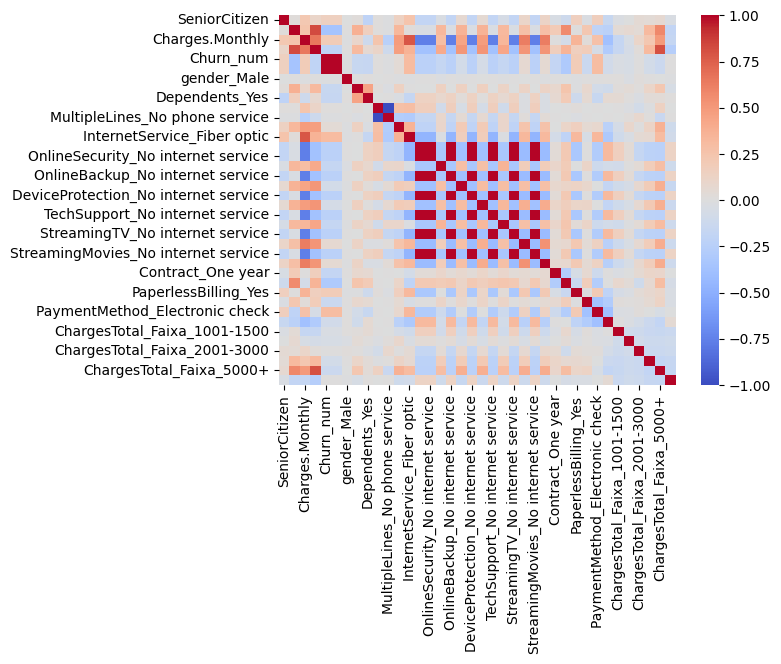

In [193]:
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.show()

In [194]:
corr = df.corr(numeric_only=True)
corr['Churn_num'].sort_values(ascending=False)

Churn_num                                1.000000
Churn_Yes                                1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
Charges.Monthly                          0.192858
PaperlessBilling_Yes                     0.191454
SeniorCitizen                            0.150541
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
PhoneService_Yes                         0.011691
ChargesTotal_Faixa_2001-3000             0.007446
ChargesTotal_Faixa_501-1000              0.003533
gender_Male                             -0.008545
MultipleLines_No phone service          -0.011691
ChargesTotal_Faixa_1001-1500            -0.034186
ChargesTotal_Faixa_1501-2000            -0.048041
DeviceProtection_Yes                    -0.066193
ChargesTotal_Faixa_3001-5000            -0.081703
OnlineBackup_Yes                        -0.082307


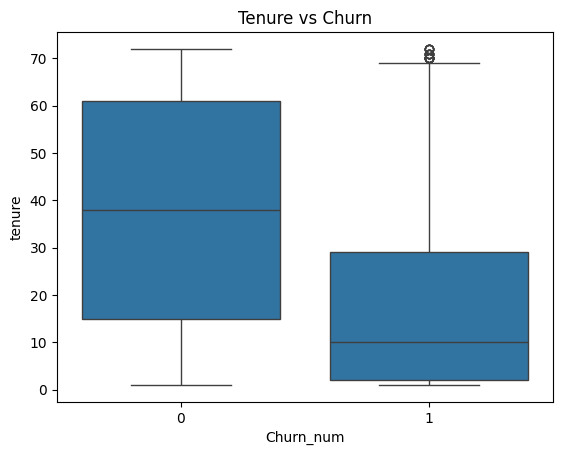

In [195]:
sns.boxplot(x='Churn_num', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()

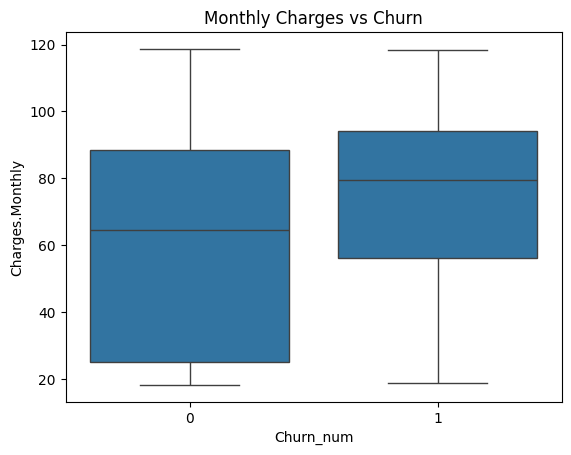

In [196]:
sns.boxplot(x='Churn_num', y='Charges.Monthly', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()


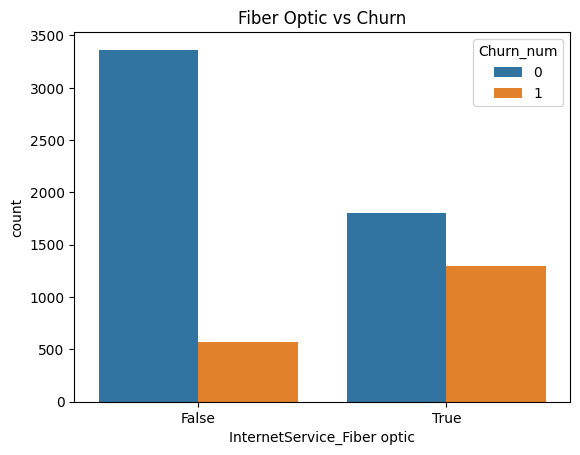

In [197]:
sns.countplot(x='InternetService_Fiber optic', hue='Churn_num', data=df)
plt.title('Fiber Optic vs Churn')
plt.show()


#### Balanceamento de Classes e Normalização

In [198]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Churn_num'])
y = df['Churn_num']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [199]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


In [200]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)  # o teste continua sem SMOTE


#### Criação de Modelos

In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

logreg = LogisticRegression(solver='liblinear', max_iter=1000)

# Regressão Logística (com dados balanceados e normalizados)
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train_bal_scaled, y_train_bal)
y_pred_lr = lr.predict(X_test_scaled)

# Random Forest (com dados balanceados, sem normalizar)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test)

#### Avaliação dos Modelos

In [202]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def avaliar_modelo(y_true, y_pred, nome):
    print(f'--- {nome} ---')
    print('Acurácia:', accuracy_score(y_true, y_pred))
    print('Precisão:', precision_score(y_true, y_pred))
    print('Recall:', recall_score(y_true, y_pred))
    print('F1-score:', f1_score(y_true, y_pred))
    print('Matriz de Confusão:\n', confusion_matrix(y_true, y_pred))
    print()

avaliar_modelo(y_test, y_pred_lr, 'Regressão Logística (SMOTE)')
avaliar_modelo(y_test, y_pred_rf, 'Random Forest (SMOTE)')


--- Regressão Logística (SMOTE) ---
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1-score: 1.0
Matriz de Confusão:
 [[1033    0]
 [   0  374]]

--- Random Forest (SMOTE) ---
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1-score: 1.0
Matriz de Confusão:
 [[1033    0]
 [   0  374]]



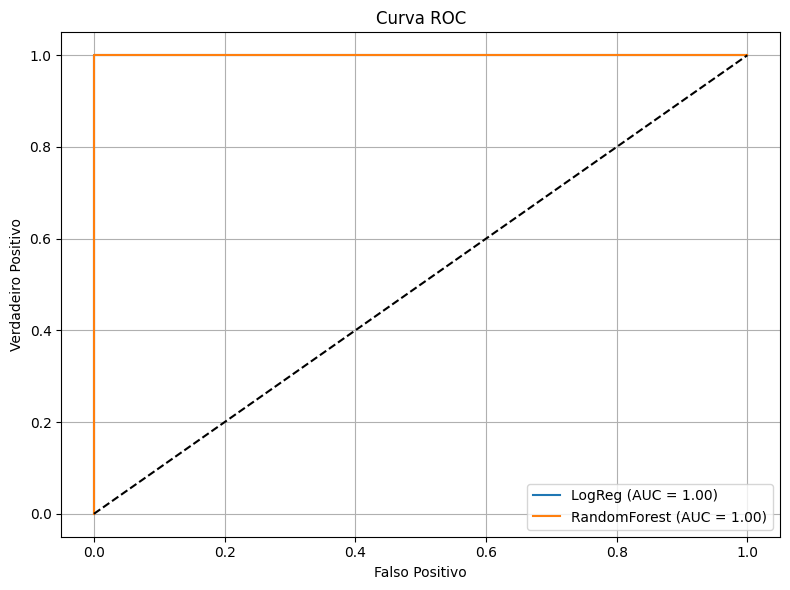

In [203]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

logreg = LogisticRegression(solver='liblinear', max_iter=1000)

# Treinando os modelos com dados balanceados
logreg.fit(X_train_bal, y_train_bal)
rf.fit(X_train_bal, y_train_bal)

# Previsões de probabilidade no conjunto de teste
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Curvas ROC
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# AUC
auc_logreg = auc(fpr_logreg, tpr_logreg)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'LogReg (AUC = {auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'RandomForest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Linha aleatória
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [204]:
print("LogReg FPR:", list(fpr_logreg))
print("LogReg TPR:", list(tpr_logreg))

print("Random Forest FPR:", list(fpr_rf))
print("Random Forest TPR:", list(tpr_rf))


LogReg FPR: [0.0, 0.0, 0.0, 1.0]
LogReg TPR: [0.0, 0.00267379679144385, 1.0, 1.0]
Random Forest FPR: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000968054211035818, 0.00484027105517909, 0.005808325266214908, 0.013552758954501452, 0.027105517909002903, 0.03484995159728945, 0.09293320425943853, 0.1345595353339787, 0.1887705711519845, 0.26621490803484993, 0.3639883833494676, 0.5062923523717329, 0.6950629235237173, 1.0]
Random Forest TPR: [0.0, 0.1497326203208556, 0.2700534759358289, 0.393048128342246, 0.4572192513368984, 0.5614973262032086, 0.6256684491978609, 0.6844919786096256, 0.7352941176470589, 0.7593582887700535, 0.8021390374331551, 0.839572192513369, 0.8716577540106952, 0.9144385026737968, 0.93048128342246, 0.9491978609625669, 0.9705882352941176, 0.9946524064171123, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [205]:
from sklearn.metrics import roc_auc_score
auc_logreg = roc_auc_score(y_test, y_prob_logreg)
print(auc_logreg)


1.0


In [206]:
print(fpr_logreg.tolist())
print(tpr_logreg.tolist())


[0.0, 0.0, 0.0, 1.0]
[0.0, 0.00267379679144385, 1.0, 1.0]


In [208]:
print(tpr_logreg.tolist())


[0.0, 0.00267379679144385, 1.0, 1.0]


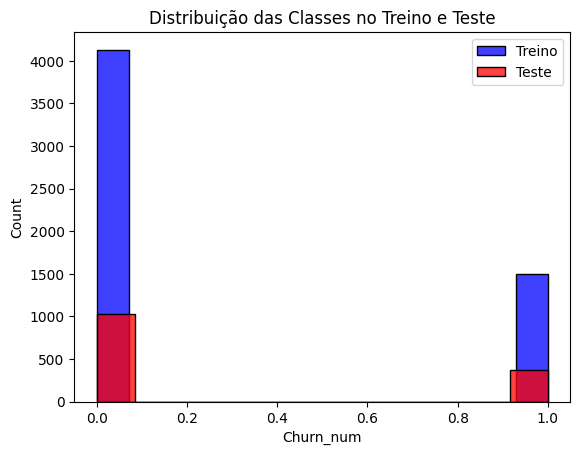

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(y_train, kde=False, color='blue', label='Treino')
sns.histplot(y_test, kde=False, color='red', label='Teste')
plt.legend()
plt.title('Distribuição das Classes no Treino e Teste')
plt.show()


In [210]:
print(X_train.shape, X_train_bal.shape)


(5625, 37) (8260, 37)


In [211]:
import numpy as np
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))


{0: 1033, 1: 374}
